# <font color = 'magenta'>ss21-Astropy-task </font>

# <font color = 'orange'> EP20B012 - Chaganti Kamaraja Siddhartha </font>

### <font color = 'red'> 1. Download the FITS file present in the data folder. </font>

#### <font color = 'purple'> Cloned the ss21-astronomy-tasks repo into local system </font>

### <font color = 'green'> Importing required libraries.</font>

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

### <font color = 'red'> 2. Read the file using astropy.io.fits module and store the returned object. </font>

In [2]:
hdulist = fits.open('/Users/siddharthachaganti/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit')

### <font color = 'red'> 3.Find the number of HDUs present in this FITS file.</font>

In [3]:
hdulist.info()

Filename: /Users/siddharthachaganti/ss21-astronomy-tasks/data/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [4]:
print("The number of HDUs present in the fits file are :", len(hdulist))

The number of HDUs present in the fits file are : 2


### <font color = 'red'>4.Read the primary header and make a list containing the answer to the following questions.</font>

In [5]:
hdu = hdulist[0] ## Primary header is present at the 0th index of hdulist.

lst = [] ## list to store the answers to following questions.

hdu.header ## Gives the information about all the headers.

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

#### <font color = 'green'> i. What is the length of axis 3?</font>

In [6]:
# NAXIS3 header gives the information about length of axis 3.
print('The length of axis 3 is :', hdu.header['NAXIS3'])

# Appending the value to the list.
lst.append(hdu.header['NAXIS3'])

The length of axis 3 is : 30


#### <font color = 'green'> ii. What is the axis 3 supposed to be?</font>

In [7]:
# CTYPE3 specifies the Axis3.

print('Axis 3 is supposed to be :', hdu.header['CTYPE3'])

# Appending the value to the list.

lst.append(hdu.header['CTYPE3'])

Axis 3 is supposed to be : photon energy


#### <font color = 'green'> iii. What are the units of axis 3? </font>

In [8]:
# CUNIT3 specifies the units of axis 3.

print('The units of axis 3 are :', hdu.header['CUNIT3'])

# Appending the value to the list.

lst.append(hdu.header['CUNIT3'])

The units of axis 3 are : MeV


#### <font color = 'green'> iv. What is the name of the telescope? </font>

In [9]:
# TELESCOP specifies the name of the telescope.

print('The name of the Telescope is :', hdu.header['TELESCOP'])

# Appending it to the list.

lst.append(hdu.header['TELESCOP'])

The name of the Telescope is : GLAST


#### <font color = 'green'> v. What is the name of the observer?</font>

In [10]:
# OBSERVER specifies the name of the observer.

print('The name of the observer is :',hdu.header['OBSERVER'])

# Appending it to the list.

lst.append(hdu.header['OBSERVER'])

The name of the observer is : MICHELSON


#### <font color = 'green'> The total list is </font>

In [11]:
print(lst)

[30, 'photon energy', 'MeV', 'GLAST', 'MICHELSON']


### <font color = 'red'> 5. Extract the data from the primary HDU. For the first slice of this data, find the maximum and minimum pixel value along with the standard deviation of this data.</font>

In [12]:
img_data = hdu.data

print('The minimum pixel in first slice is :', np.min(img_data[0]))

print('The maximum pixel in first slice is :', np.max(img_data[0]))

print('The standard deviation of pixels in first slice is :', np.std(img_data[0]))

The minimum pixel in first slice is : 7.027717e-08
The maximum pixel in first slice is : 4.5921523e-05
The standard deviation of pixels in first slice is : 1.3843595e-06


### <font color = 'red'> 6. Look into the arguments of the pyplot function imshow. Use the pixel values obtained above to limit the colour scaling of imshow. Use cmap='gray' while plotting the image. (Make the plot look nice by appropriately choosing the figure size and using labels.) </font>

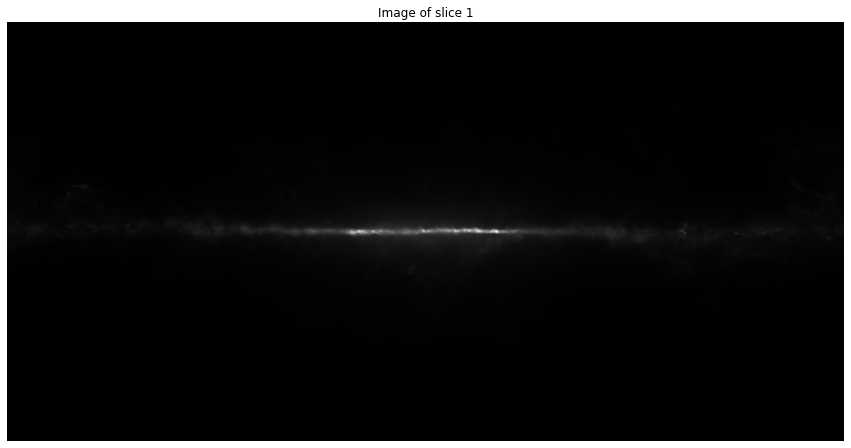

In [13]:
plt.rcParams['figure.figsize'] = [15,15]

plt.imshow(img_data[0],cmap='gray',vmin = np.min(img_data[0]),vmax=np.max(img_data[0]))
plt.title('Image of slice 1')
plt.axis('OFF')
plt.show()

### <FONT COLOR = 'RED'> 7. 'Stack' every 5th slice (slice 5, 10, 15...) of the original data. This can be done by simply summing the slices (arrays) together. Plot this new dataset by repeating task 5 and 6.</FONT>

The minimum pixel  : 2.2529157e-08
The maximum pixel  : 2.4013191e-08
The standard deviation of pixels is : 4.0517686e-10


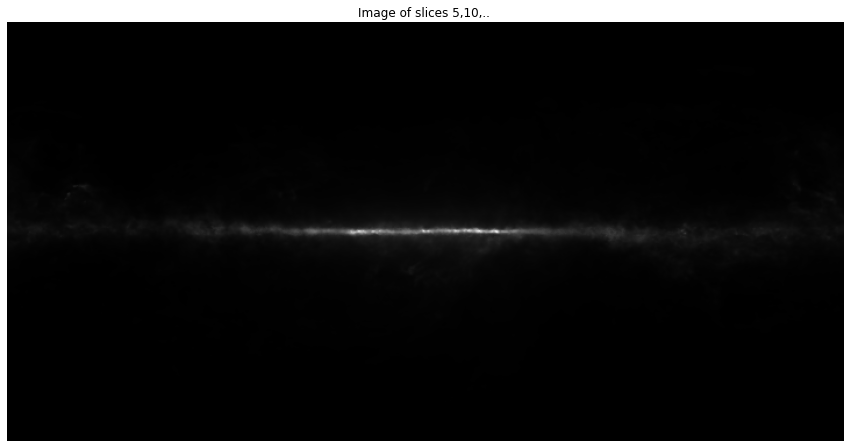

In [14]:
new_data = np.sum(img_data[4:30:5],axis=0)

print('The minimum pixel  :', np.min(new_data[0]))

print('The maximum pixel  :', np.max(new_data[0]))

print('The standard deviation of pixels is :', np.std(new_data[0]))

plt.rcParams['figure.figsize'] = [15,15]
plt.imshow(new_data,cmap='gray',vmin = np.min(new_data),vmax = np.max(new_data))
plt.title('Image of slices 5,10,.. ')
plt.axis('OFF')
plt.show()

### <font color = 'red'> 8. Create a function that plots the 'Altitude' (AltAz coordinate system) of a celestial object over a time-window of 12 hours after a given time. Assume you are located at IITM (like I did during the session) and also that the object's coordinates are known in some other coordinate system. You should need only two arguments, the coordinates of the object and the desired time of observation. Hint: The argument obstime for AltAz() can be an array!</font>

In [15]:
def Altitude(coordinates, time):
    coordinates.transform_to('galactic')
    loc = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    time = time - 5.5*u.hour
    span = np.linspace(0,12,100)*u.hour 
    alt_az_coordinate = coordinates.transform_to(AltAz(location = loc, obstime = time+span))
    plt.plot(span,alt_az_coordinate.alt)
    plt.title('Altitude vs time',c='m',size = 20)
    plt.xlabel(f'Time where {time+5.5*u.hour} IST = 0',size = 20,c='r')
    plt.ylabel('Altitude in AltAz coordinate system',size = 20,c='r')
    plt.grid()
    return plt.show()

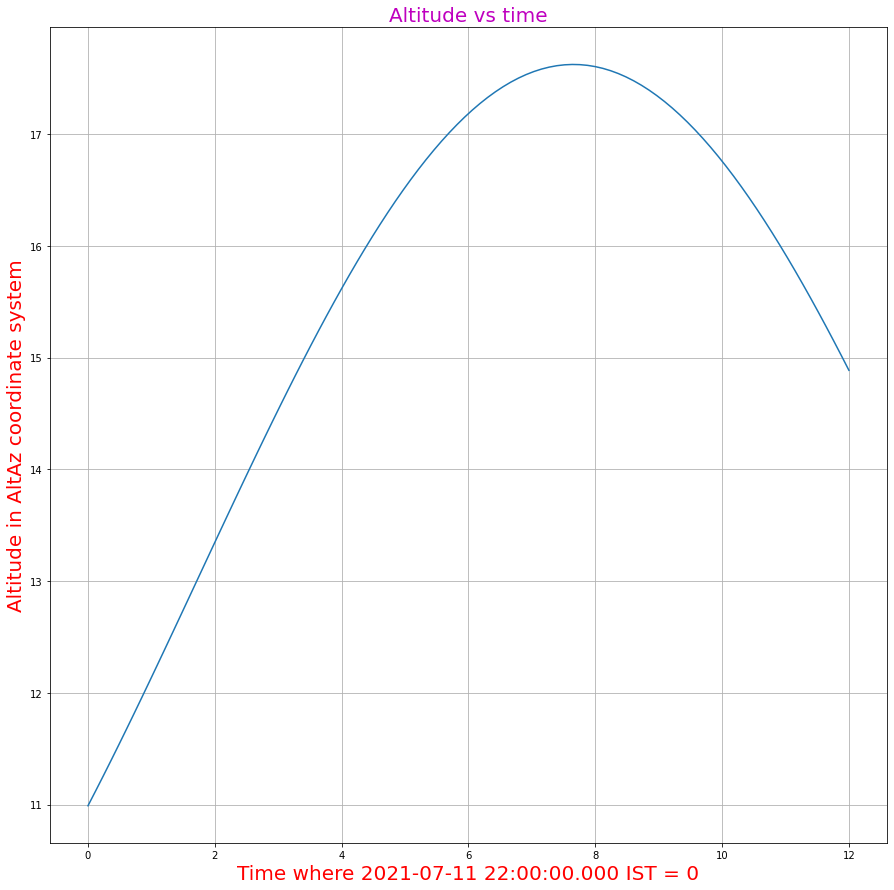

In [16]:
#Test Case

coords = SkyCoord(12.11*u.deg, 85.26*u.deg)
time = Time('2021-7-11 22:00:00')

Altitude(coords,time)

## <font color = 'red'> Quote:- </font> <font color = 'blue'> Great ability develops and reveals itself increasingly with every new assignment. 
   ## <font color = 'blue'>       - Baltasar Gracian.</font>